notebook for predictong movie revenue

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval 
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [16]:
imdb_df = pd.read_csv('/Users/jdapeman/Documents/Flatiron/microsoft_eda/data/imdb_top_1000.csv')
tn_df = pd.read_csv('/Users/jdapeman/Documents/Flatiron/microsoft_eda/data/tn.movie_budgets.csv')
tmdb_df = pd.read_csv('/Users/jdapeman/Documents/Flatiron/microsoft_eda/data/df_tmdb.csv')
df = pd.read_csv('/Users/jdapeman/Documents/Flatiron/microsoft_eda/data/df.csv')

In [17]:
imdb_df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [18]:
# in imdb.df drop the columns Poster_link, Release_Year, Series_Title, Certificate, IMDB_Rating, Meta_Score, No_of_Votes

In [21]:
# Drop the specified columns
columns_to_drop = [
    "Poster_Link", 
    "Released_Year", 
    "Series_Title", 
    "Certificate", 
    "IMDB_Rating", 
    "Meta_score", 
    "No_of_Votes"
]

imdb_df = imdb_df.drop(columns=columns_to_drop)

In [22]:
imdb_df

,Runtime,Genre,Overview,Director,Star1,Star2,Star3,Star4,Gross
0,142 min,Drama,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"28,341,469"
1,175 min,"Crime, Drama",An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"134,966,411"
2,152 min,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"534,858,444"
3,202 min,"Crime, Drama",The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,"57,300,000"
4,96 min,"Crime, Drama",A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,"4,360,000"
...,...,...,...,...,...,...,...,...,...
995,115 min,"Comedy, Drama, Romance",A young New York socialite becomes interested ...,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,NaN
996,201 min,"Drama, Western",Sprawling epic covering the life of a Texas ca...,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,NaN
997,118 min,"Drama, Romance, War","In Hawaii in 1941, a private is cruelly punish...",Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,"30,500,000"
998,97 min,"Drama, War",Several survivors of a torpedoed merchant ship...,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,NaN


In [25]:
imdb_df.columns

Index(['Runtime', 'Genre', 'Overview', 'Director', 'Star1', 'Star2', 'Star3',
       'Star4', 'Gross'],
      dtype='object')

<Axes: >

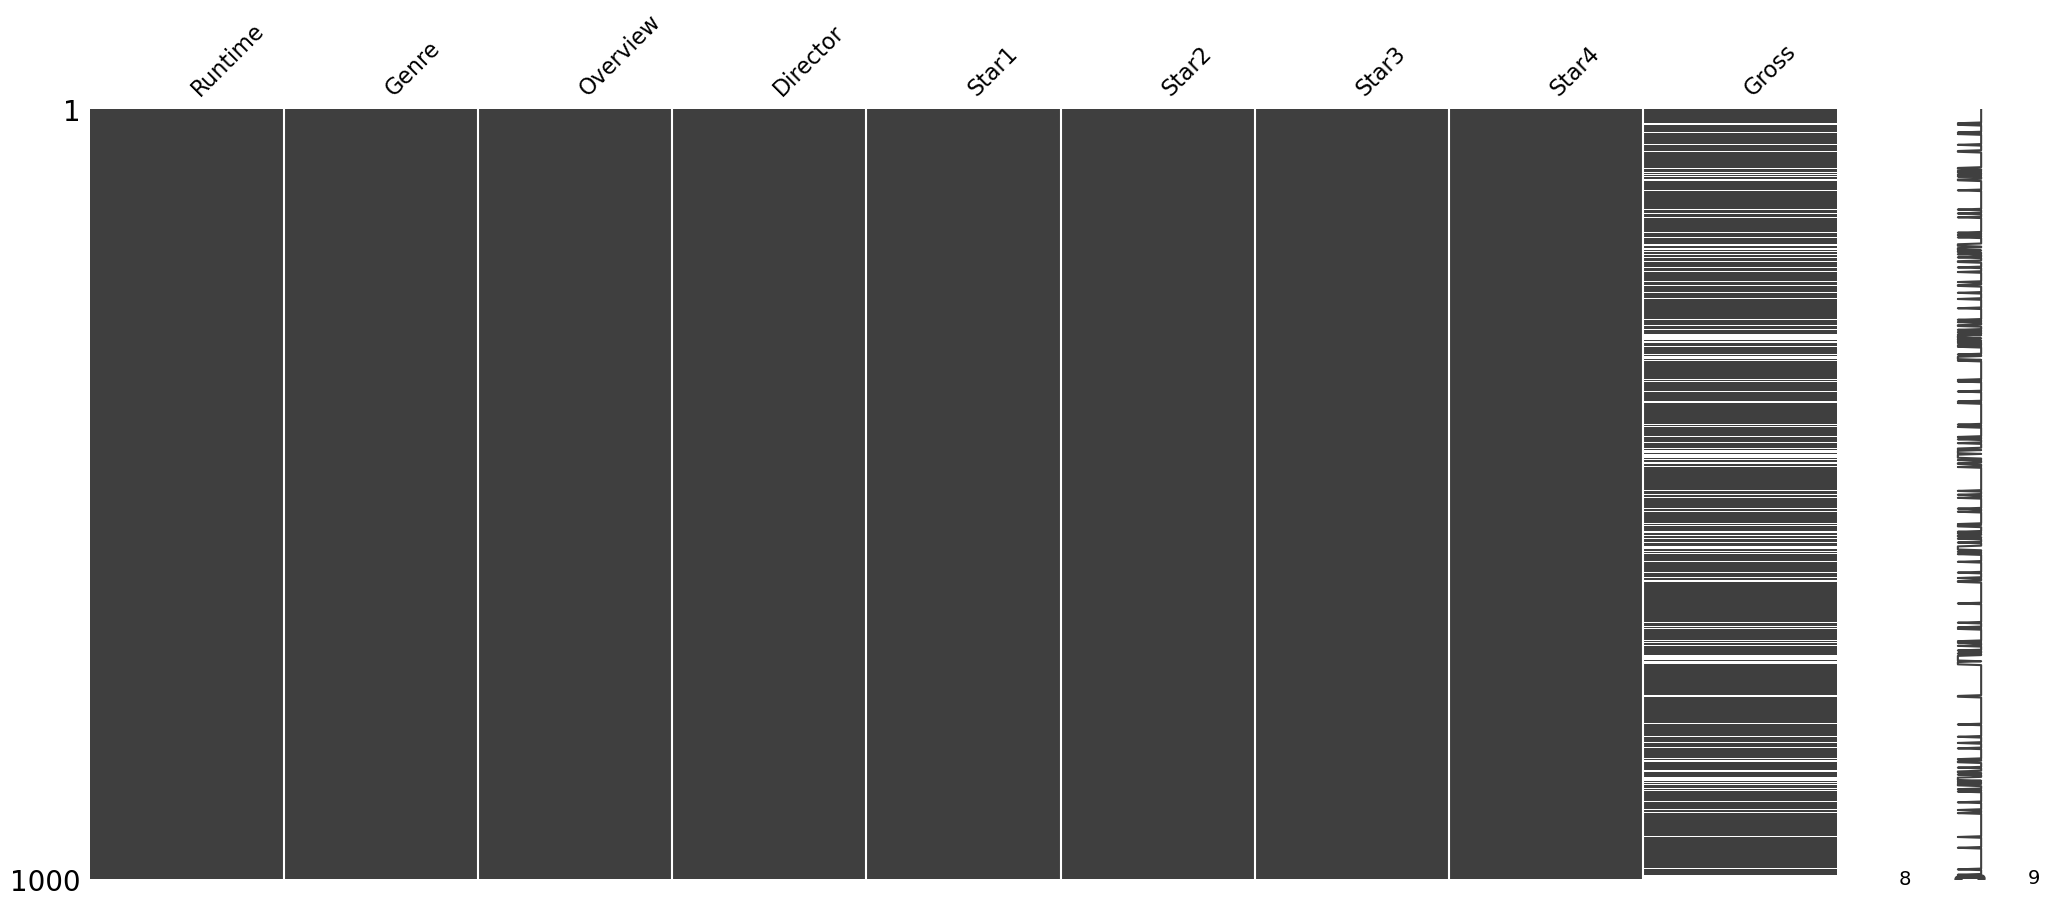

In [30]:
msno.matrix(imdb_df)

In [37]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Runtime   1000 non-null   int64  
 1   Genre     1000 non-null   object 
 2   Overview  1000 non-null   object 
 3   Director  1000 non-null   object 
 4   Star1     1000 non-null   object 
 5   Star2     1000 non-null   object 
 6   Star3     1000 non-null   object 
 7   Star4     1000 non-null   object 
 8   Gross     831 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 70.4+ KB


In [33]:
imdb_df['Runtime'] = imdb_df['Runtime'].str.replace(' min', '').astype(int)
imdb_df['Gross'] = imdb_df['Gross'].str.replace(',', '').astype(float)